# Time Series Checkpoint

This checkpoint is designed to test your knowledge of time series analysis and modeling.

Specifically, this will cover:

* Using `pandas` to manipulate time series data
* Plotting time series data
* Modeling time series data with an ARMA model

## Data Understanding

The following dataset comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction). It includes energy usage data as well as temperature and humidity data.

The relevant columns for your analysis will be:

* `date`: A string representing the timestamp of measurements taken every 10 minutes
* `lights`: An integer representing energy use of light fixtures in the house in Wh

In [23]:
# Run this cell without changes
import pandas as pd

df = pd.read_csv("energy_data.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## 1. Create a `Series` Object for Analysis

As noted previously, we do not need all of the columns of `df`. Create a `pandas` `Series` object called `light_ts` which has an index of type `DatetimeIndex` generated based on the `date` column of `df` and data from the values of the `lights` column of `df`.

***Hint:*** The `pd.to_datetime` function ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)) can convert strings representing dates into datetimes

In [28]:
# Replace None with appropriate code
#light_ts = df[['date','lights']]
# your code here

light_ts = pd.Series(df['lights'].values, index = pd.to_datetime(df['date']))
#light_ts.set_index('date',inplace=True)

In [39]:
light_ts

date
2016-01-11 17:00:00    30
2016-01-11 17:10:00    30
2016-01-11 17:20:00    30
2016-01-11 17:30:00    40
2016-01-11 17:40:00    40
                       ..
2016-05-27 17:20:00     0
2016-05-27 17:30:00     0
2016-05-27 17:40:00    10
2016-05-27 17:50:00    10
2016-05-27 18:00:00    10
Length: 19735, dtype: int64

In [29]:
# light_ts should be a Series
assert type(light_ts) == pd.Series

# light_ts should have the same number of records as df
assert light_ts.shape[0] == df.shape[0]

# The index of light_ts should be composed of datetimes
assert type(light_ts.index) == pd.DatetimeIndex

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 2. Downsample Time Series Data to Find a Daily Total

Currently this dataset has recorded the amount of energy used every hour. We want to analyze the amount of energy used every day.

Create a `Series` called `daily_ts` which contains the data from `light_ts` downsampled using the frequency string for 1 **day**, then aggregated using the **sum** of daily energy use by the lights.

***Hint:*** Here is some relevant documentation:

* See [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample) for information on the method used for upsampling and downsampling
* See [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) for the available frequency strings
* See [this page](https://pandas.pydata.org/docs/reference/resampling.html#computations-descriptive-stats) for the available aggregate functions to use after resampling

In [36]:
# Replace None with appropriate code
daily_ts = light_ts.resample('1D').sum()
# your code here
daily_ts

date
2016-01-11    1260
2016-01-12     610
2016-01-13     780
2016-01-14     720
2016-01-15     860
              ... 
2016-05-23     290
2016-05-24     610
2016-05-25     370
2016-05-26     450
2016-05-27      70
Freq: D, Length: 138, dtype: int64

In [37]:
# daily_ts should be a Series
assert type(daily_ts) == pd.Series

# daily_ts should have fewer records than light_ts
assert len(daily_ts) < len(light_ts)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

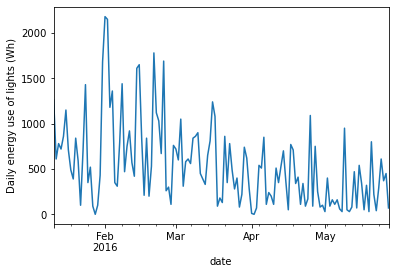

In [38]:
# Run this cell without changes
daily_ts.plot(ylabel="Daily energy use of lights (Wh)");

## 3. Check for Stationarity

Is this `daily_ts` time series stationary? You can answer this by interpreting the graph above, or using a statistical test ([documentation here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)) with an alpha of 0.05. Assign your answer to `is_stationary`.

In [50]:
# Replace None with appropriate code
from statsmodels.tsa.stattools import adfuller
print(adfuller(daily_ts))
is_stationary = False
# your code here
is_stationary

(-2.104161991717696, 0.2428443405001649, 6, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, 1818.6353819764852)


False

In [51]:
# is_stationary should be True or False
assert (is_stationary == True or is_stationary == False)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 4. Find The Weekly Rolling Average of Time Series Data

Create a `Series` called `rolling_avg_ts` that represents the **weekly (7-day)** rolling **mean** of daily energy usage.

***Hint:*** See [this documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html) for more information on calculating a rolling average.

(Note that it is expected that you'll see some NaN values at the beginning, when there have been fewer than 7 days to average.)

In [84]:
# Replace None with appropriate code
rolling_avg_ts = daily_ts.rolling(window=7).mean()
# your code here
rolling_avg_ts

date
2016-01-11           NaN
2016-01-12           NaN
2016-01-13           NaN
2016-01-14           NaN
2016-01-15           NaN
                 ...    
2016-05-23    250.000000
2016-05-24    330.000000
2016-05-25    337.142857
2016-05-26    397.142857
2016-05-27    292.857143
Freq: D, Length: 138, dtype: float64

In [85]:
# rolling_avg_ts should be a Series
assert type(rolling_avg_ts) == pd.Series

# rolling_avg_ts should have the same number of records as daily_ts
assert len(rolling_avg_ts) == len(daily_ts)

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

In the cell below, we plot the raw daily data, the 7-day moving average, and the difference between the raw daily data and the moving average.

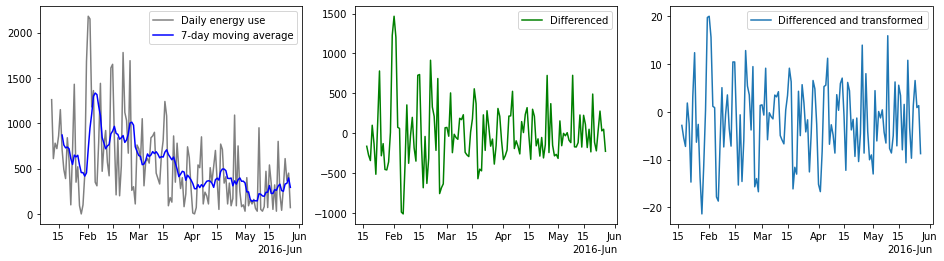

In [62]:
# Run this cell without changes

import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
import numpy as np

differenced_ts = daily_ts - rolling_avg_ts
differenced_ts.dropna(inplace=True)
differenced_transformed_ts = np.sqrt(daily_ts) - np.sqrt(rolling_avg_ts)
differenced_transformed_ts.dropna(inplace=True)

fig, axes = plt.subplots(ncols=3, figsize=(16,4))

axes[0].plot(daily_ts, color="gray", label="Daily energy use", )
axes[0].plot(rolling_avg_ts, color="blue", label="7-day moving average")
axes[1].plot(differenced_ts, color="green", label="Differenced")
axes[2].plot(differenced_transformed_ts, label="Differenced and transformed")

locator = AutoDateLocator()
formatter = ConciseDateFormatter(locator)

for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.legend()

## 5. Choose a Dataset and Build an AR(I)MA Model

Based on the plots above, choose the most-stationary time series data out of:

* `daily_ts`
* `differenced_ts`
* `differenced_transformed_ts`

And plug it into an AR(I)MA model ([documentation here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html))

You can use any order `(p, d, q)` that you want, so long as it doesn't produce a warning message.

In [77]:
# Replace None with appropriate code
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(differenced_transformed_ts, order=(1,0,0))
# your code here

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -463.677
Date:                Fri, 29 Apr 2022   AIC                            933.354
Time:                        20:43:42   BIC                            942.002
Sample:                    01-17-2016   HQIC                           936.868
                         - 05-27-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8772      0.906     -2.073      0.038      -3.652      -0.102
ar.L1          0.2165      0.078      2.768      0.006       0.063       0.370
sigma2        65.8359      9.296      7.082      0.000      47.617      84.055
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.78   Prob(JB):                         0.49
Heteroskedasticity (H):               0.62   Skew:                             0.12
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
# model should be an ARIMA model
assert type(model) == ARIMA

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS